<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/06_pca_noisy_gaussian_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA:Noisy Gaussian Data

Principal components capture the variance of mean-subtracted Gaussian data.

Let's consider the noisy cloud of data that generated by selecting 10, 000 vectors from a two-dimensional normal distribution with
zero mean and unit variance. 

These vectors are then scaled in the x and y directions by the
values as follows:


||$\sigma_1$|$\sigma_2$|
|---|---|---|
|Data|2|1|
|SVD|1.974|0.503|

And rotated by $\frac{\pi}{3}$.

Finally, the entire cloud of data is translated so that
it has a nonzero center $X_c=\begin{bmatrix} 2 & 1 \end{bmatrix}^T$.

The matrix U from the SVD also closely matches the rotation
matrix, up to a sign on the columns:

$$
R_{\pi/3}=\begin{bmatrix} 0.5 & -0.8660 \\ 0.8660 & 0.5 \end{bmatrix},
U=\begin{bmatrix} -0.4998 & -0.8662 \\ -0.8662 & 0.4998 \end{bmatrix}
$$


##Setup

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

Let's generate data.

In [5]:
x_c = np.array([2, 1])        # Center of data (mean)
sigma = np.array([2, 0.5])    # Principal axes

theta = np.pi / 3             # Rotate cloud by pi/3

R = np.array([                # Rotation matrix
  [np.cos(theta), -np.sin(theta)],
  [np.sin(theta), np.cos(theta)]            
])

n_points = 10000              # Create 10,000 points

X = R @ np.diag(sigma) @ np.random.randn(2, n_points) + np.diag(x_c) @ np.ones((2, n_points))

Let's find principal components (SVD).

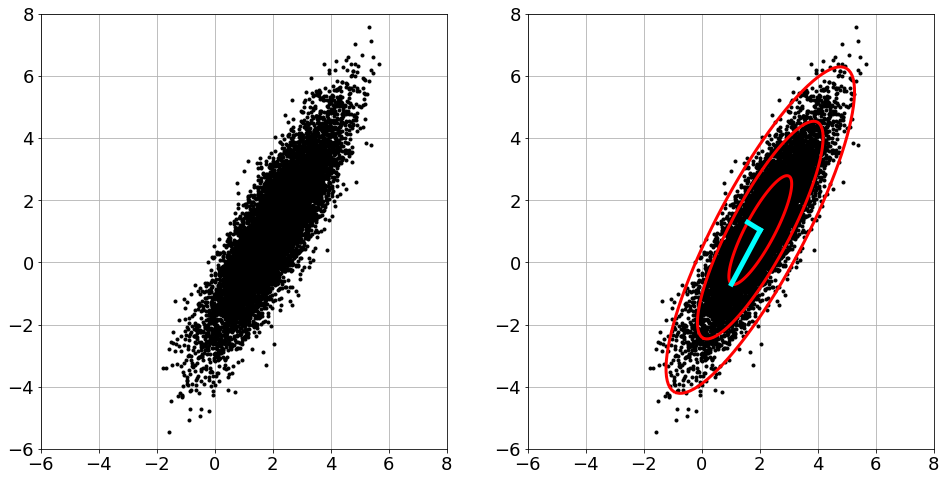

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

x_avg = np.mean(X, axis=1)                # Compute mean
B = X - np.tile(x_avg, (n_points, 1)).T   # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B / np.sqrt(n_points), full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std confidence interval
x_std = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(x_avg[0] + x_std[0,:], x_avg[1] + x_std[1,:],'-',color='r',LineWidth=3)
ax2.plot(x_avg[0] + 2*x_std[0,:], x_avg[1] + 2*x_std[1,:],'-',color='r',LineWidth=3)
ax2.plot(x_avg[0] + 3*x_std[0,:], x_avg[1] + 3*x_std[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([x_avg[0], x_avg[0]+U[0,0]*S[0]]),
         np.array([x_avg[1], x_avg[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([x_avg[0], x_avg[0]+U[0,1]*S[1]]),
         np.array([x_avg[1], x_avg[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.show()

The first three standard deviation ellipsoids (red), and the two left singular vectors, scaled by singular values $(\sigma_1u_1 + x_c)$ and $(\sigma_2u_2 + x_c)$ (cyan).